In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
%matplotlib inline
import csv

In [3]:
cab_data = pd.read_csv("data_with_features.csv")
del cab_data["Unnamed: 0"]
del cab_data["Unnamed: 0.1"]
del cab_data["Unnamed: 0.1.1"]

In [4]:
cab_data.columns.values

array(['dropoff_latitude', 'dropoff_longitude', 'pickup_latitude',
       'pickup_longitude', 'total_amount', 'tpep_dropoff_datetime',
       'tpep_pickup_datetime', 'start_latlng', 'end_latlng', 'distance',
       'tpep_dropoff_datetime_years', 'tpep_dropoff_datetime_months',
       'tpep_dropoff_datetime_days', 'tpep_dropoff_datetime_hours',
       'tpep_dropoff_datetime_minutes', 'tpep_dropoff_datetime_seconds',
       'tpep_dropoff_datetime_day_of_week',
       'tpep_dropoff_datetime_is_holiday', 'tpep_pickup_datetime_years',
       'tpep_pickup_datetime_months', 'tpep_pickup_datetime_days',
       'tpep_pickup_datetime_hours', 'tpep_pickup_datetime_minutes',
       'tpep_pickup_datetime_seconds', 'tpep_pickup_datetime_day_of_week',
       'tpep_pickup_datetime_is_holiday', 'duration', 'Mean Temperature',
       'Max Temperature', 'Min Temperature', 'Dew Point',
       'Average Humidity', 'Precipitation', 'Snow', 'Wind Speed',
       'Visibility'], dtype=object)

In [5]:
cab_data.head()

,dropoff_latitude,dropoff_longitude,pickup_latitude,pickup_longitude,total_amount,tpep_dropoff_datetime,tpep_pickup_datetime,start_latlng,end_latlng,distance,...,duration,Mean Temperature,Max Temperature,Min Temperature,Dew Point,Average Humidity,Precipitation,Snow,Wind Speed,Visibility
0,40.777241,-73.951744,40.776424,-73.952850,15.35,2016-04-03T00:09:40.000,2016-04-02T23:55:45.000,"40.777241, -73.951744","40.776424, -73.952850",0.080895,...,14,42,50,34,16,51,0.09,0.0,13,10
1,40.777611,-73.951080,40.789371,-73.943352,12.30,2016-04-22T09:45:11.000,2016-04-22T09:27:51.000,"40.777611, -73.951080","40.789371, -73.943352",0.907077,...,17,71,79,62,53,55,0.00,0.0,4,10
2,40.770386,-73.966476,40.761303,-73.973183,5.80,2016-04-29T20:26:47.000,2016-04-29T20:23:57.000,"40.770386, -73.966476","40.761303, -73.973183",0.718773,...,3,52,58,45,34,48,0.05,0.0,6,10
3,40.767288,-73.966675,40.764381,-73.995583,10.80,2016-04-08T11:21:10.000,2016-04-08T11:10:26.000,"40.767288, -73.966675","40.764381, -73.995583",1.529830,...,11,45,50,40,26,48,0.01,0.0,7,10
4,40.744068,-73.988991,40.754742,-73.979820,7.30,2016-04-28T09:09:32.000,2016-04-28T09:04:28.000,"40.744068, -73.988991","40.754742, -73.979820",0.879828,...,5,54,59,48,30,51,0.00,0.0,5,10


We notice that there are some trips that have prices less than 0! We remove rows with negative prices below.

In [6]:
price_filter = cab_data["total_amount"] > 0
cab_data = cab_data[price_filter]

How many trips have prices greater than $100?

In [7]:
high_prices = cab_data.loc[cab_data['total_amount'] >= 100]
print(len(high_prices))
print(max(cab_data['total_amount']))
high_prices

1348
998.3


,dropoff_latitude,dropoff_longitude,pickup_latitude,pickup_longitude,total_amount,tpep_dropoff_datetime,tpep_pickup_datetime,start_latlng,end_latlng,distance,...,duration,Mean Temperature,Max Temperature,Min Temperature,Dew Point,Average Humidity,Precipitation,Snow,Wind Speed,Visibility
541,40.687695,-74.181274,40.785633,-73.969040,112.80,2016-04-18T08:38:22.000,2016-04-18T07:57:53.000,"40.687695, -74.181274","40.785633, -73.969040",13.029107,...,40,67,82,51,30,34,0.00,0.0,4,10
1053,40.217884,-74.004501,40.724216,-74.006996,209.15,2016-04-07T02:29:58.000,2016-04-07T01:13:02.000,"40.217884, -74.004501","40.724216, -74.006996",34.936829,...,77,53,58,48,45,69,0.09,0.0,7,9
2507,40.722610,-74.063568,40.770317,-73.867020,115.30,2016-04-08T10:54:51.000,2016-04-08T09:50:31.000,"40.722610, -74.063568","40.770317, -73.867020",10.827208,...,64,45,50,40,26,48,0.01,0.0,7,10
2520,40.697224,-73.811440,40.781620,-73.979401,103.59,2016-04-03T01:07:46.000,2016-04-03T00:04:33.000,"40.697224, -73.811440","40.781620, -73.979401",10.565227,...,63,42,50,34,16,51,0.09,0.0,13,10
2533,40.687714,-74.182350,40.644825,-73.781975,138.88,2016-04-02T19:40:58.000,2016-04-02T18:49:45.000,"40.687714, -74.182350","40.644825, -73.781975",21.243622,...,51,55,61,49,42,63,0.15,0.0,5,10
3239,40.342941,-74.626205,40.342941,-74.626205,298.30,2016-04-27T00:19:29.000,2016-04-27T00:19:07.000,"40.342941, -74.626205","40.342941, -74.626205",0.000000,...,0,54,62,46,39,60,0.00,0.0,4,10
3375,40.480938,-74.610222,40.780010,-74.057304,185.30,2016-04-08T02:51:58.000,2016-04-08T01:52:05.000,"40.480938, -74.610222","40.780010, -74.057304",35.647392,...,60,45,50,40,26,48,0.01,0.0,7,10
3654,40.695061,-74.177368,40.750671,-73.973953,112.56,2016-04-27T06:12:53.000,2016-04-27T05:42:17.000,"40.695061, -74.177368","40.750671, -73.973953",11.347277,...,31,54,62,46,39,60,0.00,0.0,4,10
3803,40.694988,-74.177078,40.725483,-73.989548,101.80,2016-04-08T04:43:11.000,2016-04-08T04:15:14.000,"40.694988, -74.177078","40.725483, -73.989548",10.069046,...,28,45,50,40,26,48,0.01,0.0,7,10
4906,40.891144,-74.054306,40.644604,-73.781815,133.34,2016-04-08T10:14:31.000,2016-04-08T09:12:45.000,"40.891144, -74.054306","40.644604, -73.781815",22.220859,...,62,45,50,40,26,48,0.01,0.0,7,10


We remove rows with really high prices too. 

In [8]:
# price_filter = cab_data["total_amount"] <= 50
# cab_data = cab_data[price_filter]

Here's a histogram of the total_amount feature, the price of the trip (our response variable).

(array([  7.90136000e+05,   1.33736000e+05,   3.83690000e+04,
          1.77190000e+04,   1.60100000e+03,   7.48000000e+02,
          2.43000000e+02,   1.45000000e+02,   6.20000000e+01,
          5.60000000e+01,   2.80000000e+01,   2.20000000e+01,
          9.00000000e+00,   9.00000000e+00,   8.00000000e+00,
          8.00000000e+00,   4.00000000e+00,   3.00000000e+00,
          5.00000000e+00,   1.00000000e+00,   4.00000000e+00,
          3.00000000e+00,   7.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   3.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        

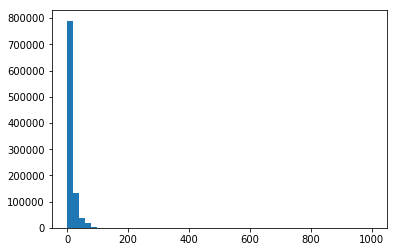

In [9]:
plt.hist(cab_data["total_amount"], bins=50)

The histogram of the price feature is quite skewed and quite non-normal.  suggesting that a linear model will be a poor fit. We use a log transform of the price feature below.

((array([-4.82353497, -4.64362929, -4.54636112, ...,  4.54636112,
          4.64362929,  4.82353497]),
  array([  1.00000000e-02,   3.00000000e-01,   3.00000000e-01, ...,
           6.77800000e+02,   7.25300000e+02,   9.98300000e+02])),
 (10.824147811952631, 15.880819636273369, 0.80562467708200214))

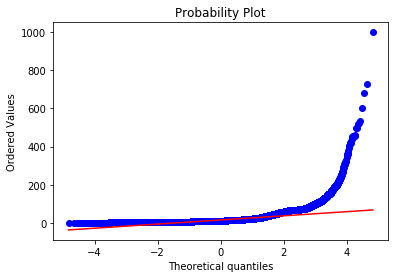

In [10]:
stats.probplot(cab_data["total_amount"], dist="norm", plot=plt)

(array([  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   2.06000000e+02,
          3.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   6.00000000e+00,   0.00000000e+00,
          2.00000000e+00,   4.00000000e+00,   2.00000000e+00,
          1.30000000e+01,   3.66800000e+03,   1.51370000e+04,
          6.38880000e+04,   1.19399000e+05,   1.72432000e+05,
          1.65874000e+05,   1.45312000e+05,   1.04177000e+05,
          6.68720000e+04,   3.99420000e+04,   2.62050000e+04,
          2.33850000e+04,   1.82050000e+04,   1.51790000e+04,
          1.65200000e+03,   8.48000000e+02,   2.76000000e+02,
          1.24000000e+02,   6.00000000e+01,   2.40000000e+01,
          1.50000000e+01,   1.70000000e+01,   4.00000000e+00,
        

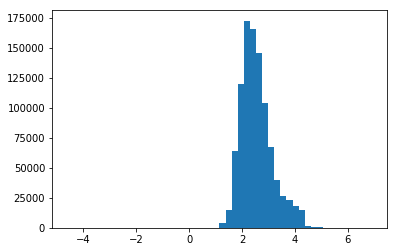

In [11]:
cab_data["log_total_amount"] = np.log(cab_data["total_amount"] + 1)
plt.hist(np.log(cab_data["total_amount"]), bins=50)

The plot above looks more normal, as evidenced by the qq plot below.

((array([-4.82353497, -4.64362929, -4.54636112, ...,  4.54636112,
          4.64362929,  4.82353497]),
  array([ 0.00995033,  0.26236426,  0.26236426, ...,  6.52032653,
          6.58796315,  6.90705503])),
 (0.53922967709457903, 2.6428798090460202, 0.97236933129256198))

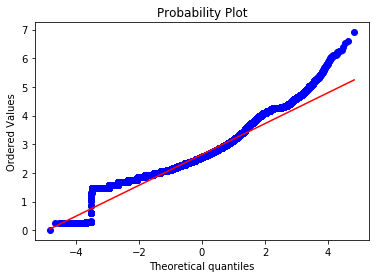

In [12]:
stats.probplot(cab_data["log_total_amount"], dist="norm", plot=plt)

Next, we create a scatter plot of the price vs. the distance. 

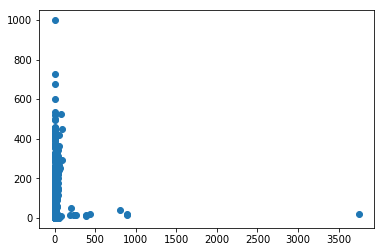

In [13]:
plt.scatter(cab_data["distance"], cab_data["total_amount"])

There are some really large distances!

(array([  9.82922000e+05,   2.00000000e+00,   2.00000000e+00,
          3.00000000e+00,   0.00000000e+00,   3.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   2.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        

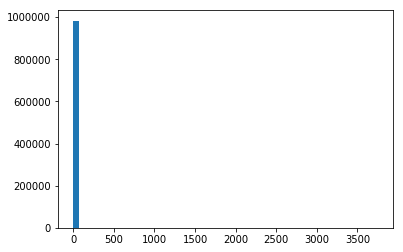

In [14]:
plt.hist(cab_data["distance"], bins=50)

How many rows have distances of 30 miles or greater? 

In [15]:
print(max(cab_data["distance"]))
cab_data.loc[cab_data['distance'] >= 30]

3750.21441809


,dropoff_latitude,dropoff_longitude,pickup_latitude,pickup_longitude,total_amount,tpep_dropoff_datetime,tpep_pickup_datetime,start_latlng,end_latlng,distance,...,Mean Temperature,Max Temperature,Min Temperature,Dew Point,Average Humidity,Precipitation,Snow,Wind Speed,Visibility,log_total_amount
1053,40.217884,-74.004501,40.724216,-74.006996,209.15,2016-04-07T02:29:58.000,2016-04-07T01:13:02.000,"40.217884, -74.004501","40.724216, -74.006996",34.936829,...,53,58,48,45,69,0.09,0.0,7,9,5.347822
3375,40.480938,-74.610222,40.780010,-74.057304,185.30,2016-04-08T02:51:58.000,2016-04-08T01:52:05.000,"40.480938, -74.610222","40.780010, -74.057304",35.647392,...,45,50,40,26,48,0.01,0.0,7,10,5.227358
17854,40.519405,-74.339905,40.648731,-73.783676,213.38,2016-04-05T12:14:33.000,2016-04-05T10:55:11.000,"40.519405, -74.339905","40.648731, -73.783676",30.591596,...,35,43,26,8,44,0.00,0.0,8,10,5.367750
18178,37.014931,-73.779167,40.761887,-73.970695,12.80,2016-04-06T16:09:59.000,2016-04-06T15:54:25.000,"37.014931, -73.779167","40.761887, -73.970695",258.673050,...,39,48,30,17,48,0.00,0.0,6,10,2.624669
50103,40.355362,-74.612106,40.664669,-73.845230,221.38,2016-04-21T21:45:35.000,2016-04-21T19:55:06.000,"40.355362, -74.612106","40.664669, -73.845230",45.679090,...,61,73,49,35,37,0.00,0.0,6,10,5.404388
67430,41.064316,-73.630234,40.721786,-74.011505,152.84,2016-04-21T02:18:20.000,2016-04-21T01:20:24.000,"41.064316, -73.630234","40.721786, -74.011505",30.939456,...,61,73,49,35,37,0.00,0.0,6,10,5.035913
99032,40.503105,-74.451790,40.797325,-73.971581,60.80,2016-04-28T14:56:12.000,2016-04-28T13:47:23.000,"40.503105, -74.451790","40.797325, -73.971581",32.389275,...,54,59,48,30,51,0.00,0.0,5,10,4.123903
103394,41.104870,-73.443687,40.762520,-73.962402,202.05,2016-04-21T02:53:45.000,2016-04-21T01:56:50.000,"41.104870, -73.443687","40.762520, -73.962402",35.985209,...,61,73,49,35,37,0.00,0.0,6,10,5.313452
116821,40.571915,-74.440308,40.646259,-73.791100,220.30,2016-04-22T18:46:06.000,2016-04-22T16:18:36.000,"40.571915, -74.440308","40.646259, -73.791100",34.522957,...,71,79,62,53,55,0.00,0.0,4,10,5.399519
136820,40.813801,-73.310188,40.744209,-74.003036,116.80,2016-04-11T05:13:36.000,2016-04-11T04:21:09.000,"40.813801, -73.310188","40.744209, -74.003036",36.658023,...,54,65,43,37,51,0.01,0.0,7,10,4.768988


Let's try limiting the max distance of a trip?

In [16]:
# distance_filter = cab_data["distance"] <= 30
# cab_data = cab_data[distance_filter]

Below, we show the histogram of distances, and scatter plot of price vs. distance again, with the filtered data. 

(array([  9.82922000e+05,   2.00000000e+00,   2.00000000e+00,
          3.00000000e+00,   0.00000000e+00,   3.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   2.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        

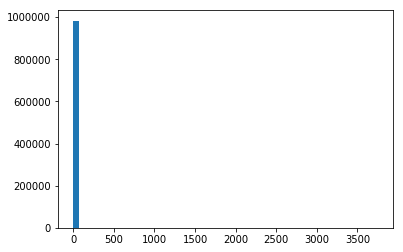

In [17]:
plt.hist(cab_data["distance"], bins=50)

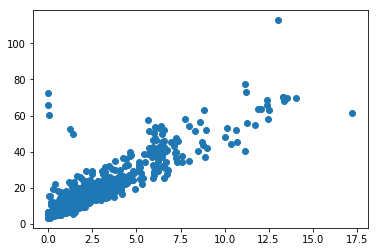

In [18]:
num_points = 1000
plt.scatter(cab_data["distance"][:num_points], cab_data["total_amount"][:num_points])

There seems to be a linear relationship between the total_amount and the distance of the trip! But, notice that there seems to be a non-linear relationship between the log_total_amount and distance below!!

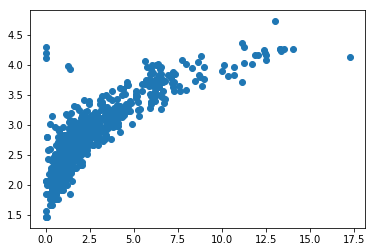

In [19]:
num_points = 1000
plt.scatter(cab_data["distance"][:num_points], cab_data["log_total_amount"][:num_points])

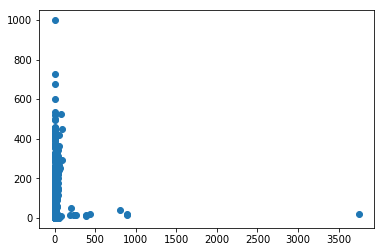

In [20]:
plt.scatter(cab_data["distance"], cab_data["total_amount"])

In the case of excess data, the above plot loses its ability to indicate the density of the data. We can also create a 2D histogram of the data. 

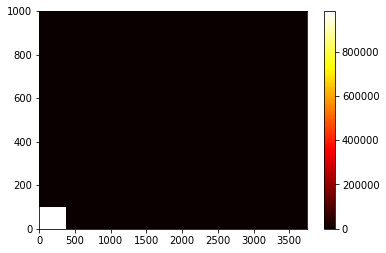

In [21]:
plt.hist2d(cab_data["distance"],cab_data["total_amount"],bins=10);
plt.colorbar();
plt.set_cmap('hot')

## Model 1: Linear Regression

In [22]:
def create_features(df):
    features = []
    feature_names = ['distance', 'duration', 'tpep_dropoff_datetime_years', 'tpep_dropoff_datetime_months',
       'tpep_dropoff_datetime_days', 'tpep_dropoff_datetime_hours',
       'tpep_dropoff_datetime_minutes', 'tpep_dropoff_datetime_seconds',
       'tpep_dropoff_datetime_day_of_week',
       'tpep_dropoff_datetime_is_holiday', 'tpep_pickup_datetime_years',
       'tpep_pickup_datetime_months', 'tpep_pickup_datetime_days',
       'tpep_pickup_datetime_hours', 'tpep_pickup_datetime_minutes',
       'tpep_pickup_datetime_seconds', 'tpep_pickup_datetime_day_of_week',
       'tpep_pickup_datetime_is_holiday', 'Mean Temperature',
       'Max Temperature', 'Min Temperature', 'Dew Point',
       'Average Humidity', 'Precipitation', 'Snow', 'Wind Speed',
       'Visibility']
    for feature_name in feature_names:
        features.append(df[feature_name])
    
    X = np.array(features).T
    y = df["log_total_amount"].values
    return (X,y)

In [23]:
def create_train_test_split(X,y):
    X_, X_test, y_, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)
    X_train, X_cv, y_train, y_cv = train_test_split(X_, y_, test_size = 0.3, random_state=0)
    
    return (X_train, y_train, X_cv, y_cv, X_test, y_test)

In [24]:
def train_linear_regression(X_train, y_train, X_test, y_test):
    model = linear_model.LinearRegression(fit_intercept=True, normalize=False)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Mean squared error: %.5f"
          % mean_squared_error(y_test, y_pred))
    return (model, y_pred)

In [25]:
def predict(df, model):
    (X,y) = create_features(df)
    y_pred = model.predict(X)
    y_actual = df["log_total_amount"].values
    return y_pred, y_actual

In [26]:
(X,y) = create_features(cab_data)
(X_train, y_train, X_cv, y_cv, X_test, y_test) = create_train_test_split(X,y)
(model, y_pred) = train_linear_regression(X_train, y_train, X_cv, y_cv)

Mean squared error: 0.10979


Let's try a basic linear model to predict the log_total_amount and see how it performs.

In [27]:
np.exp(y_pred)-1, np.exp(y_test)-1

(array([  9.46746089,  10.61094022,  10.73486937, ...,  84.90552823,
         14.84678775,  13.646145  ]),
 array([ 10.35,  30.95,  15.35, ...,  11.3 ,   7.56,  10.8 ]))

How does our model work on the really high priced features? 

In [28]:
high_price_df = cab_data.loc[cab_data['total_amount'] > 500]
high_price_df

,dropoff_latitude,dropoff_longitude,pickup_latitude,pickup_longitude,total_amount,tpep_dropoff_datetime,tpep_pickup_datetime,start_latlng,end_latlng,distance,...,Mean Temperature,Max Temperature,Min Temperature,Dew Point,Average Humidity,Precipitation,Snow,Wind Speed,Visibility,log_total_amount
252695,40.695141,-74.177559,40.757565,-73.992691,677.80,2016-04-17T15:01:36.000,2016-04-17T14:32:37.000,"40.695141, -74.177559","40.757565, -73.992691",10.617585,...,60,75,44,30,43,0.0,0.0,3,10,6.520327
296891,39.941269,-75.165733,39.941383,-75.165810,725.30,2016-01-21T15:21:16.000,2016-01-21T15:06:43.000,"39.941269, -75.165733","39.941383, -75.165810",0.008865,...,31,36,26,11,45,0.0,0.0,6,10,6.587963
395022,40.639725,-73.937752,40.639721,-73.937752,520.35,2016-04-18T22:02:38.000,2016-04-18T22:01:59.000,"40.639725, -73.937752","40.639721, -73.937752",0.000276,...,67,82,51,30,34,0.0,0.0,4,10,6.256422
646286,41.719555,-73.894859,40.648712,-73.783669,522.84,2016-01-13T01:37:25.000,2016-01-12T23:37:21.000,"41.719555, -73.894859","40.648712, -73.783669",74.123629,...,26,30,22,4,42,0.0,0.0,10,10,6.261186
685900,40.773983,-73.870621,40.758141,-73.989555,534.84,2016-01-18T20:12:53.000,2016-01-18T19:52:33.000,"40.773983, -73.870621","40.758141, -73.989555",6.334735,...,25,31,18,6,53,0.0,0.0,12,9,6.283836
785701,40.758991,-73.937126,40.753460,-73.942963,602.80,2016-01-21T21:44:26.000,2016-01-21T21:41:51.000,"40.758991, -73.937126","40.753460, -73.942963",0.489351,...,31,36,26,11,45,0.0,0.0,6,10,6.403243
817160,40.769207,-73.954987,40.769211,-73.954987,998.30,2016-01-01T04:12:52.000,2016-01-01T04:11:14.000,"40.769207, -73.954987","40.769211, -73.954987",0.000276,...,38,42,34,23,52,0.0,0.0,8,10,6.907055


In [29]:
y_high_price_pred, y_high_price_actual = predict(high_price_df, model)

In [30]:
print(np.exp(y_high_price_pred) - 1)
print(np.exp(y_high_price_actual) - 1)

[  5.59128709e+01   9.09219044e+00   9.39391289e+00   2.27317072e+06
   2.61517642e+01   9.94287087e+00   8.02508682e+00]
[ 677.8   725.3   520.35  522.84  534.84  602.8   998.3 ]


In [31]:
def filter_data(cab_data):
    cab_data = cab_data[cab_data["total_amount"] >= 0]
    cab_data = cab_data[cab_data["total_amount"] <= 50]
    
    cab_data = cab_data[cab_data["distance"] >= 0]
    cab_data = cab_data[cab_data["distance"] <= 100]
    
    cab_data = cab_data[cab_data['dropoff_latitude'] >= 40.4]
    cab_data = cab_data[cab_data['dropoff_latitude'] <= 41]
    cab_data = cab_data[cab_data['dropoff_longitude'] >= -74.3] #-74.3
    cab_data = cab_data[cab_data['dropoff_longitude'] <= -73.5] #-73.5
    
    cab_data = cab_data[cab_data['pickup_latitude'] >= 40.4]
    cab_data = cab_data[cab_data['pickup_latitude'] <= 41]
    cab_data = cab_data[cab_data['pickup_longitude'] >= -75]
    cab_data = cab_data[cab_data['pickup_longitude'] <= -72]
    
    return cab_data
cab_data = filter_data(cab_data)

In [32]:
(X,y) = create_features(cab_data)
(X_train, y_train, X_cv, y_cv, X_test, y_test) = create_train_test_split(X,y)
(model, y_pred) = train_linear_regression(X_train, y_train, X_cv, y_cv)

Mean squared error: 0.06454


## Model 2: Gradient Boosting Regressor

In [33]:
from sklearn.ensemble import GradientBoostingRegressor

clf = GradientBoostingRegressor()
clf.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [34]:
print("Training MSE: ", np.mean((clf.predict(X_train) - y_train)**2))
print("Baseline training MSE: ", np.mean((np.mean(y_train) - y_train)**2))

Training MSE:  0.0155140948981
Baseline training MSE:  0.223299264109


In [35]:
print("CV MSE: ", np.mean((clf.predict(X_cv) - y_cv)**2))
print("Baseline CV MSE: ", np.mean((np.mean(y_train) - y_cv)**2))

CV MSE:  0.015695626099
Baseline CV MSE:  0.222950525042


In [36]:
print("Test MSE: ", np.mean((clf.predict(X_test) - y_test)**2))
print("Baseline Test MSE: ", np.mean((np.mean(y_train) - y_test)**2))

Test MSE:  0.0156141717316
Baseline Test MSE:  0.22328588427


In [37]:
## These are the 50 most inaccurate predictions
preds = clf.predict(X_test)
diffs = []
for i in range(len(preds)):
    pred = preds[i]
    act = y_test[i]
    diffs.append((abs(pred - act), i))
diffs = sorted(diffs, reverse=True)
for diff,index in diffs[:50]:
    print(np.exp(y_test[index]) - 1, np.exp(preds[index]) - 1)

0.3 46.355941425
0.3 39.7636601905
0.31 38.4940313161
0.3 37.9864263812
0.3 36.7547310413
0.31 25.9935265977
0.3 24.6411690955
0.3 17.18580804
0.3 16.6176209853
2.6 38.1559066802
0.3 11.6403679728
3.8 43.4206668299
50.0 4.54427937088
0.3 10.9131209599
3.3 36.9205953087
0.3 9.92833124733
3.8 38.2342896162
3.3 34.0133643549
3.8 36.5048187448
44.81 5.07093756806
0.31 8.80706709242
44.34 5.09842774902
0.31 8.62799703397
42.85 5.1394420876
0.31 8.35605194529
48.35 5.93820035933
39.8 4.78018552798
47.58 5.92010740574
47.8 5.95524603272
45.3 5.61485876512
46.64 5.93820035933
46.3 5.95116732162
40.6 5.28881182544
40.0 5.21469098746
45.3 6.01943983422
3.3 27.0213492948
40.0 5.36941648957
35.3 4.73138007322
0.3 7.16914282016
0.31 7.19135982969
39.35 5.48380325388
0.31 7.141407619
35.3 4.8485485657
0.3 7.0379669858
0.31 7.0379669858
38.42 5.43211750035
0.31 7.0128042715
36.0 5.13113924913
40.3 5.87448237713
0.3 6.76399515672


Below is a graph showing the training and testing MSE as a function of sample size. Notice that, interestingly, we get close to MSE of 0.04 on the validation set even after fitting a model on just the first 1000 samples!

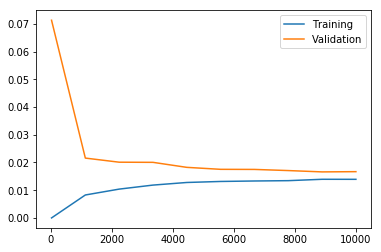

In [38]:
def get_err_samples(clf, X, y, X_cv, y_cv, n_samples):
    clf.fit(X[:n_samples], y[:n_samples])
    return np.array([np.mean((clf.predict(X[:n_samples]) - y[:n_samples])**2), 
                     np.mean((clf.predict(X_cv) - y_cv)**2)])

n_samples = [int(x) for x in np.linspace(20, 10000, 10)] # 1000, 2000, ..., 10000
errors = np.array([get_err_samples(clf, X_train, y_train, X_cv, y_cv, n) for n in n_samples])
plt.plot(n_samples, errors[:,0], n_samples, errors[:,1])
plt.legend(["Training", "Validation"])

In [39]:
X_train.shape[0]

463767

TO DO: hyperparameter tuning?

## Comparison With Uber

In [135]:
X_test = pd.read_csv('price_features.csv')
del X_test['i']
del X_test['tpep_dropoff_datetime']
del X_test['tpep_pickup_datetime']
model_results = clf.predict(X_test)

In [136]:
uber_pricing_estimates = []
with open('price_estimates.csv', 'r') as f:
    r = csv.reader(f)
    uber_pricing_estimates = list(r)

uber_pricing_estimates.pop(0)

['min_estimate', ' max_estimate', ' avg_estimate']

In [138]:
assert(len(model_results) == len(uber_pricing_estimates))

for i in range(len(model_results)):
    uber_hi, uber_lo, uber_avg = uber_pricing_estimates[i]
    #Weird formatting stuff, ignore for now
    uber_avg = uber_avg[:len(uber_avg)-1]
    uber_hi = uber_hi[1:]

    our_estimate = model_results[i]
    
    print("For trip %d, Model: %f Uber: %s" % (i, np.exp(our_estimate) - 1, uber_avg))

For trip 0, Model: 14.286533 Uber:  15.0
For trip 1, Model: 17.829200 Uber:  20.5
For trip 2, Model: 14.071785 Uber:  62.0
For trip 3, Model: 11.338719 Uber:  13.0
For trip 4, Model: 12.706218 Uber:  12.5
For trip 5, Model: 11.584649 Uber:  9.5
For trip 6, Model: 10.615901 Uber:  9.5
For trip 7, Model: 13.758450 Uber:  17.0
For trip 8, Model: 13.172767 Uber:  15.0
For trip 9, Model: 29.281859 Uber:  54.0
For trip 10, Model: 9.470319 Uber:  9.5
For trip 11, Model: 9.454592 Uber:  9.5
For trip 12, Model: 12.449409 Uber:  11.5
For trip 13, Model: 9.293473 Uber:  9.5
For trip 14, Model: 16.747380 Uber:  55.0
For trip 15, Model: 7.429262 Uber:  12.0
For trip 16, Model: 12.706218 Uber:  14.0
For trip 17, Model: 12.582401 Uber:  10.5
For trip 18, Model: 8.148591 Uber:  9.5
For trip 19, Model: 9.192354 Uber:  9.5
For trip 20, Model: 18.755106 Uber:  18.0
For trip 21, Model: 17.075754 Uber:  16.0
For trip 22, Model: 26.701192 Uber:  26.0
For trip 23, Model: 7.766542 Uber:  9.5
For trip 24, Mode